In [1]:
import pandas as pd
import numpy as np

# https://www.kaggle.com/jr2ngb/superstore-data
df = pd.read_csv('./archive.zip', encoding='unicode_escape', parse_dates=['Order Date', 'Ship Date']) 

df

Row ID         Order ID Order Date  Ship Date       Ship Mode  \
0       42433     AG-2011-2040 2011-01-01 2011-06-01  Standard Class   
1       22253    IN-2011-47883 2011-01-01 2011-08-01  Standard Class   
2       48883     HU-2011-1220 2011-01-01 2011-05-01    Second Class   
3       11731  IT-2011-3647632 2011-01-01 2011-05-01    Second Class   
4       22255    IN-2011-47883 2011-01-01 2011-08-01  Standard Class   
...       ...              ...        ...        ...             ...   
51285   32593   CA-2014-115427 2014-12-31 2015-04-01  Standard Class   
51286   47594     MO-2014-2560 2014-12-31 2015-05-01  Standard Class   
51287    8857   MX-2014-110527 2014-12-31 2015-02-01    Second Class   
51288    6852   MX-2014-114783 2014-12-31 2015-06-01  Standard Class   
51289   36388   CA-2014-156720 2014-12-31 2015-04-01  Standard Class   

      Customer ID     Customer Name      Segment         City  \
0        TB-11280   Toby Braunhardt     Consumer  Constantine   
1        JH-15985       Joseph Holt     Consumer  Wagga Wagga   
2          AT-735     Annie Thurman     Consumer     Budapest   
3        EM-14140      Eugene Moren  Home Office    Stockholm   
4        JH-15985       Joseph Holt     Consumer  Wagga Wagga   
...           ...               ...          ...          ...   
51285    EB-13975        Erica Bern    Corporate    Fairfield   
51286     LP-7095         Liz Preis     Consumer       Agadir   
51287    CM-12190  Charlotte Melton     Consumer      Managua   
51288    TD-20995     Tamara Dahlen     Consumer       Juárez   
51289    JM-15580     Jill Matthias     Consumer     Loveland   

                  State  ...        Product ID         Category Sub-Category  \
0           Constantine  ...  OFF-TEN-10000025  Office Supplies      Storage   
1       New South Wales  ...   OFF-SU-10000618  Office Supplies     Supplies   
2              Budapest  ...  OFF-TEN-10001585  Office Supplies      Storage   
3             Stockholm  ...   OFF-PA-10001492  Office Supplies        Paper   
4       New South Wales  ...   FUR-FU-10003447        Furniture  Furnishings   
...                 ...  ...               ...              ...          ...   
51285        California  ...   OFF-BI-10002103  Office Supplies      Binders   
51286  Souss-Massa-Draâ  ...  OFF-WIL-10001069  Office Supplies      Binders   
51287           Managua  ...   OFF-LA-10004182  Office Supplies       Labels   
51288         Chihuahua  ...   OFF-LA-10000413  Office Supplies       Labels   
51289          Colorado  ...   OFF-FA-10003472  Office Supplies    Fasteners   

                                          Product Name    Sales Quantity  \
0                                  Tenex Lockers, Blue  408.300        2   
1                             Acme Trimmer, High Speed  120.366        3   
2                              Tenex Box, Single Width   66.120        4   
3                          Enermax Note Cards, Premium   44.865        3   
4                           Eldon Light Bulb, Duo Pack  113.670        5   
...                                                ...      ...      ...   
51285  Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl   13.904        2   
51286          Wilson Jones Hole Reinforcements, Clear    3.990        1   
51287           Hon Color Coded Labels, 5000 Label Set   26.400        3   
51288           Hon Legal Exhibit Labels, Alphabetical    7.120        1   
51289                              Bagged Rubber Bands    3.024        3   

      Discount    Profit  Shipping Cost  Order Priority  
0          0.0  106.1400          35.46          Medium  
1          0.1   36.0360           9.72          Medium  
2          0.0   29.6400           8.17            High  
3          0.5  -26.0550           4.82            High  
4          0.1   37.7700           4.70          Medium  
...        ...       ...            ...             ...  
51285      0.2    4.5188           0.89          Medium  
51286      0.0    0.420

In [2]:
df.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Postal Code              float64
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

In [3]:
from pandas_profiling import ProfileReport

In [4]:
profile = ProfileReport(df, title='Pandas Profiling SuperstoreData')

In [5]:
profile

In [6]:
df_customer = df.groupby('Customer ID').agg({
    'Order Date': 'max',
    'Sales': 'sum',
    'Quantity': 'mean',
    'Customer ID': 'count',
})
df_customer

Order Date        Sales  Quantity  Customer ID
Customer ID                                               
AA-10315    2014-12-23  13747.41300  3.452381           42
AA-10375    2014-12-25   5884.19500  3.309524           42
AA-10480    2014-09-05  17695.58978  3.947368           38
AA-10645    2014-12-05  15343.89070  3.657534           73
AA-315      2014-12-29   2243.25600  2.500000            8
...                ...          ...       ...          ...
YS-21880    2014-12-22  18703.60600  3.648148           54
ZC-11910    2014-06-14      7.17300  1.000000            1
ZC-21910    2014-12-28  28472.81926  3.964286           84
ZD-11925    2014-12-28   2951.22600  3.055556           18
ZD-21925    2014-12-30   9479.34440  3.305556           36

[1590 rows x 4 columns]

In [7]:
df_customer.columns = ['Latest Order Date', 'Total Sales', 'Mean Quantity', 'Total Orders']

In [8]:
df_customer.columns

Index(['Latest Order Date', 'Total Sales', 'Mean Quantity', 'Total Orders'], dtype='object')

In [9]:
df_customer['Days Since Order'] = df_customer['Latest Order Date'].max() - df_customer['Latest Order Date']

In [10]:
df_customer.drop(columns='Latest Order Date', inplace=True)

In [11]:
df_customer['Days Since Order'] = df_customer['Days Since Order'].dt.days

In [55]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


numerical_cols = ['Total Sales', 'Mean Quantity', 'Total Orders', 'Days Since Order']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
])

column_trans = ColumnTransformer(
    [
        ('num', numeric_transformer, numerical_cols)
    ],
    remainder='drop'
)

cl = Pipeline(steps=[('preprocessor', column_trans),
                      ('cluster', KMeans())])




In [56]:
Sum_of_squared_distances = {}
K = range(1,15)
for k in K:
    cl.set_params(cluster__n_clusters=k)
    cl.fit(df_customer)
    Sum_of_squared_distances.update({k: cl.named_steps['cluster'].inertia_})

In [57]:
Sum_of_squared_distances

{1: 6360.000000000003,
 2: 2640.038597732388,
 3: 1805.1444729338418,
 4: 1451.6286232119937,
 5: 1251.1755104625797,
 6: 1095.4883211804843,
 7: 980.9986633551601,
 8: 894.3646400730006,
 9: 816.1275410491992,
 10: 743.3854495983767,
 11: 694.0910253942224,
 12: 653.2975056089082,
 13: 619.1575900053451,
 14: 586.1321100136287}

<AxesSubplot:>

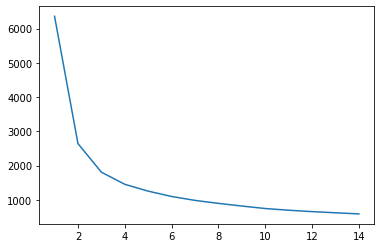

In [58]:
pd.Series(Sum_of_squared_distances).plot()

In [59]:
cl.set_params(cluster__n_clusters=3)
cl.fit(df_customer)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Total Sales',
                                                   'Mean Quantity',
                                                   'Total Orders',
                                                   'Days Since Order'])])),
                ('cluster', KMeans(n_clusters=3))])

In [20]:
df_customer['cluster'] = cl.predict(df_customer)
df_customer

Total Sales  Mean Quantity  Total Orders  Days Since Order  \
Customer ID                                                               
AA-10315     13747.41300       3.452381            42                 8   
AA-10375      5884.19500       3.309524            42                 6   
AA-10480     17695.58978       3.947368            38               117   
AA-10645     15343.89070       3.657534            73                26   
AA-315        2243.25600       2.500000             8                 2   
...                  ...            ...           ...               ...   
YS-21880     18703.60600       3.648148            54                 9   
ZC-11910         7.17300       1.000000             1               200   
ZC-21910     28472.81926       3.964286            84                 3   
ZD-11925      2951.22600       3.055556            18                 3   
ZD-21925      9479.34440       3.305556            36                 1   

             cluster  
Customer ID           
AA-10315           0  
AA-10375           0  
AA-10480           0  
AA-10645           0  
AA-315             2  
...              ...  
YS-21880           0  
ZC-11910           2  
ZC-21910           0  
ZD-11925           2  
ZD-21925           0  

[1590 rows x 5 columns]

In [21]:
df_customer_melt = pd.melt(
    df_customer, 
    id_vars='cluster',
    value_vars=numerical_cols,
    ignore_index=False
)
df_customer_melt

cluster          variable        value
Customer ID                                        
AA-10315           0       Total Sales  13747.41300
AA-10375           0       Total Sales   5884.19500
AA-10480           0       Total Sales  17695.58978
AA-10645           0       Total Sales  15343.89070
AA-315             2       Total Sales   2243.25600
...              ...               ...          ...
YS-21880           0  Days Since Order      9.00000
ZC-11910           2  Days Since Order    200.00000
ZC-21910           0  Days Since Order      3.00000
ZD-11925           2  Days Since Order      3.00000
ZD-21925           0  Days Since Order      1.00000

[6360 rows x 3 columns]

In [22]:
import seaborn as sns

<AxesSubplot:xlabel='variable', ylabel='value'>

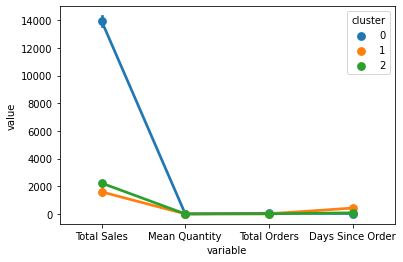

In [23]:
# not very useful as values have different scales
sns.pointplot(data=df_customer_melt, x='variable', y='value', hue='cluster')

In [75]:
df_preprocessed = pd.DataFrame(
    column_trans.transform(df_customer),
    columns=numerical_cols,
    index=df_customer.index
)
df_preprocessed['cluster'] = cl.predict(df_customer)
df_preprocessed

Total Sales  Mean Quantity  Total Orders  Days Since Order  \
Customer ID                                                               
AA-10315        0.835857       0.449707      0.444773         -0.622788   
AA-10375       -0.298089       0.296919      0.444773         -0.638432   
AA-10480        1.405218       0.979106      0.262155          0.229843   
AA-10645        1.066083       0.669123      1.860064         -0.481986   
AA-315         -0.823144      -0.568882     -1.107482         -0.669722   
...                  ...            ...           ...               ...   
YS-21880        1.550583       0.659084      0.992627         -0.614966   
ZC-11910       -1.145607      -2.173160     -1.427063          0.879094   
ZC-21910        2.959390       0.997199      2.362264         -0.661899   
ZD-11925       -0.721049       0.025295     -0.650936         -0.661899   
ZD-21925        0.220363       0.292675      0.170846         -0.677544   

             cluster  
Customer ID           
AA-10315           0  
AA-10375           0  
AA-10480           0  
AA-10645           0  
AA-315             1  
...              ...  
YS-21880           0  
ZC-11910           1  
ZC-21910           0  
ZD-11925           1  
ZD-21925           0  

[1590 rows x 5 columns]

In [79]:
df_preprocessed_melt = pd.melt(
    df_preprocessed, 
    id_vars='cluster',
    value_vars=numerical_cols,
    ignore_index=False
)
df_preprocessed_melt

cluster          variable     value
Customer ID                                     
AA-10315           0       Total Sales  0.835857
AA-10375           0       Total Sales -0.298089
AA-10480           0       Total Sales  1.405218
AA-10645           0       Total Sales  1.066083
AA-315             1       Total Sales -0.823144
...              ...               ...       ...
YS-21880           0  Days Since Order -0.614966
ZC-11910           1  Days Since Order  0.879094
ZC-21910           0  Days Since Order -0.661899
ZD-11925           1  Days Since Order -0.661899
ZD-21925           0  Days Since Order -0.677544

[6360 rows x 3 columns]

<AxesSubplot:xlabel='variable', ylabel='value'>

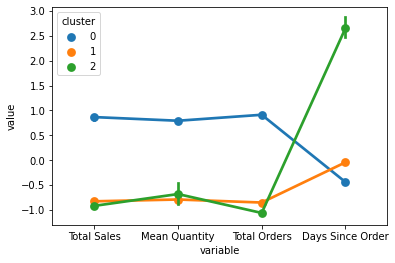

In [81]:
sns.pointplot(data=df_preprocessed_melt, x='variable', y='value', hue='cluster')

<AxesSubplot:xlabel='variable', ylabel='value'>

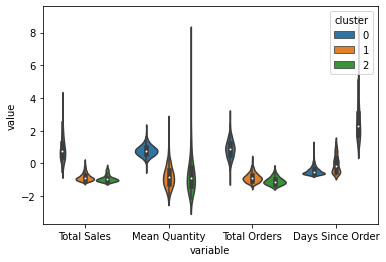

In [83]:
sns.violinplot(data=df_preprocessed_melt, x='variable', y='value', hue='cluster')